<a href="https://colab.research.google.com/github/PHDieu661/Deep_Learning/blob/main/Perceptron_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Giới thiệu

Perceptron là một thuật toán Classification cho trường hợp đơn giản nhất: chỉ có hai class (lớp) (bài toán với chỉ hai class được gọi là binary classification) và cũng chỉ hoạt động được trong một trường hợp rất cụ thể. Tuy nhiên, nó là nền tảng cho một mảng lớn quan trọng của Machine Learning là Neural Networks và sau này là Deep Learning.

Giả sử chúng ta có hai tập hợp dữ liệu, hai class của chúng ta là tập các điểm màu xanh và tập các điểm màu đỏ. Bài toán đặt ra là: từ dữ liệu của hai tập được gán nhãn cho trước, hãy xây dựng một classifier (bộ phân lớp) để khi có một điểm dữ liệu hình tam giác màu xám mới, ta có thể dự đoán được màu (nhãn) của nó.

Bài toán Perceptron được phát biểu như sau: Cho hai class được gán nhãn, hãy tìm một đường phẳng sao cho toàn bộ các điểm thuộc class 1 nằm về 1 phía, toàn bộ các điểm thuộc class 2 nằm về phía còn lại của đường phẳng đó. Với giả định rằng tồn tại một đường phẳng như thế.

# Load thư viện và tạo dữ liệu

Chúng ta sẽ tạo hai nhóm dữ liệu, mỗi nhóm có 10 điểm, mỗi điểm dữ liệu có hai chiều để thuận tiện cho việc minh họa. Sau đó, tạo dữ liệu mở rộng bằng cách thêm 1 vào đầu mỗi điểm dữ liệu.

In [ ]:
# generate data
# list of points
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

Sau khi thực hiện đoạn code này, biến X sẽ chứa dữ liệu input (mở rộng), biến y sẽ chứa nhãn của mỗi điểm dữ liệu trong X.

# Các hàm số cho PLA

Tiếp theo chúng ta cần viết 3 hàm số cho PLA:

* h(w, x): tính đầu ra khi biết đầu vào x và weights w.
* has_converged(X, y, w): kiểm tra xem thuật toán đã hội tụ chưa. Ta chỉ cần so sánh h(w, X) với ground truth y. Nếu giống nhau thì dừng thuật toán.
* perceptron(X, y, w_init): hàm chính thực hiện PLA.

In [ ]:
def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):

    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi

                w.append(w_new)

        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(m)
# print(w)
# print(len(w))

def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

# Kết quả

[np.int64(7), np.int64(10), np.int64(0), np.int64(18), np.int64(3), np.int64(6), np.int64(14), np.int64(9), np.int64(7), np.int64(17), np.int64(0), np.int64(19), np.int64(3), np.int64(2), np.int64(12), np.int64(6), np.int64(11), np.int64(7)]


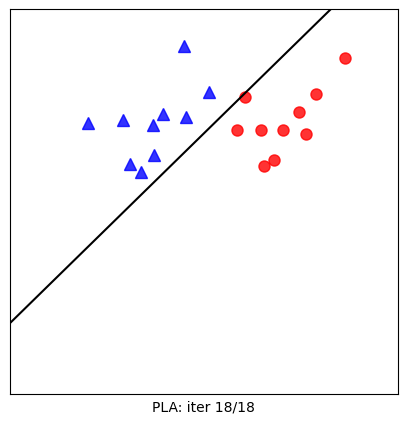

In [ ]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))

    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one  misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)
        # hide axis
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax

    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save
    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()

viz_alg_1d_2(w)

# Kết quả Gif

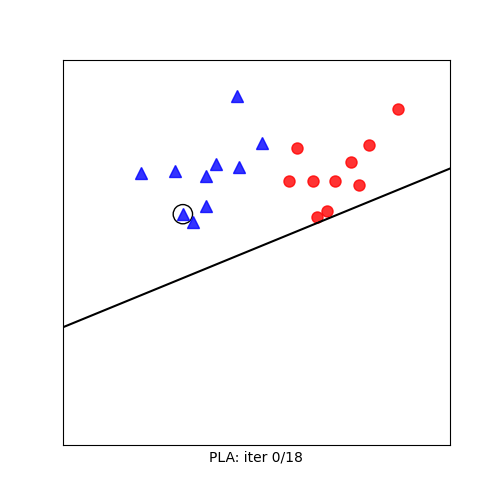

In [ ]:
from IPython.display import Image

# Display the saved GIF
Image('pla_vis.gif')